# Agglomerative Clustering

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv('C:/Users/Dell/Downloads/USArrests.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [18]:
# Basic eda and data cleaning

data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [19]:
data.shape

(50, 5)

In [20]:
data['Unnamed: 0'].value_counts()

Washington        1
Indiana           1
West Virginia     1
Arkansas          1
Rhode Island      1
Colorado          1
Idaho             1
Utah              1
Maryland          1
New York          1
Oklahoma          1
Alabama           1
Missouri          1
Massachusetts     1
Illinois          1
New Mexico        1
Montana           1
Tennessee         1
New Jersey        1
California        1
Iowa              1
Delaware          1
Michigan          1
Nebraska          1
New Hampshire     1
Kansas            1
Georgia           1
Alaska            1
Vermont           1
Ohio              1
South Dakota      1
Kentucky          1
Pennsylvania      1
Texas             1
Hawaii            1
Minnesota         1
North Dakota      1
Wisconsin         1
Mississippi       1
Maine             1
North Carolina    1
Nevada            1
Connecticut       1
South Carolina    1
Virginia          1
Oregon            1
Arizona           1
Florida           1
Louisiana         1
Wyoming           1


In [21]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [22]:
# Renaming the column that contains the states
data.rename(columns = {'Unnamed: 0':'States'}, inplace = True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


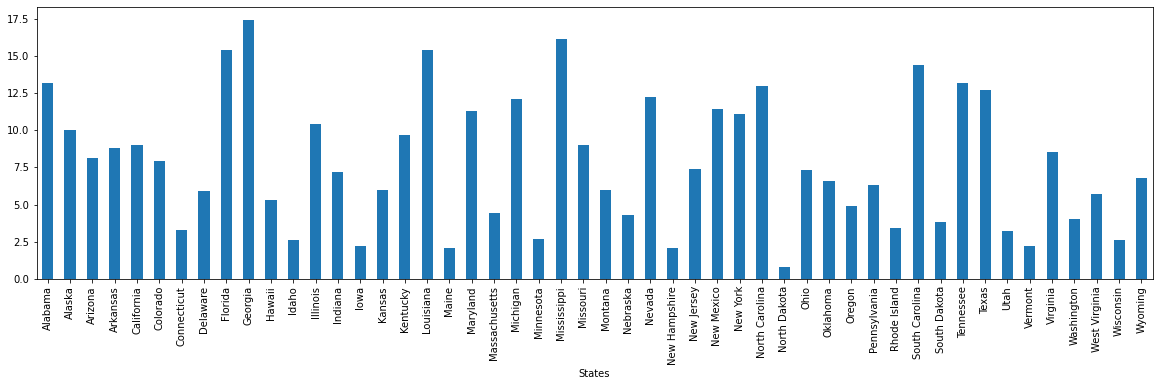

In [58]:
# Checking the murder rate
plt.figure(figsize = (20,5))
data.groupby('States')['Murder'].max().plot(kind ='bar')
plt.show()

In [23]:
# Converting the States column to numeric using get_dummies from pandas library
data_num = pd.get_dummies(data, columns = ['States'])
data_num.head()

,Murder,Assault,UrbanPop,Rape,States_Alabama,States_Alaska,States_Arizona,States_Arkansas,States_California,States_Colorado,...,States_South Dakota,States_Tennessee,States_Texas,States_Utah,States_Vermont,States_Virginia,States_Washington,States_West Virginia,States_Wisconsin,States_Wyoming
0,13.2,236,58,21.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Using average linkage as the distance metrics

link = linkage(data_num, 'average')
link

array([[ 14.        ,  28.        ,   2.6925824 ,   2.        ],
       [ 16.        ,  25.        ,   4.08656335,   2.        ],
       [ 13.        ,  15.        ,   4.1761226 ,   2.        ],
       [ 12.        ,  31.        ,   6.39531078,   2.        ],
       [ 34.        ,  43.        ,   6.7867518 ,   2.        ],
       [ 35.        ,  45.        ,   7.48999332,   2.        ],
       [  6.        ,  37.        ,   8.15107355,   2.        ],
       [ 18.        ,  40.        ,   8.65390085,   2.        ],
       [ 48.        ,  50.        ,  10.2823621 ,   3.        ],
       [ 49.        ,  55.        ,  10.83611024,   3.        ],
       [ 47.        ,  57.        ,  10.86685976,   3.        ],
       [ 20.        ,  29.        ,  11.54339638,   2.        ],
       [ 26.        ,  51.        ,  12.51925264,   3.        ],
       [  3.        ,  41.        ,  12.69330532,   2.        ],
       [ 36.        ,  59.        ,  12.95749268,   4.        ],
       [ 33.        ,  44

In [28]:
# Implementing the agglomerative clustering

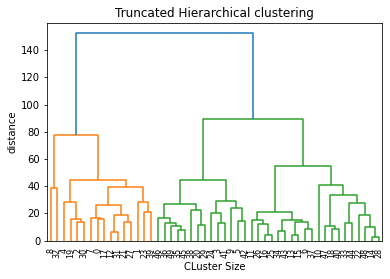

In [29]:
dendrogram(link)
plt.title('Truncated Hierarchical clustering')
plt.xlabel('CLuster Size')
plt.ylabel('distance')
plt.show()

In [30]:
k = 3

h_cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

h_cluster.fit(data_num)

AgglomerativeClustering(n_clusters=3)

In [31]:
cluster = h_cluster.fit_predict(data_num)

In [32]:
data['Cluster_Label'] = cluster

In [33]:
data.iloc[:,[0,5]]

,States,Cluster_Label
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [34]:
# Silhouette Score
print('Silhouette Score: %0.3f' % metrics.silhouette_score(data_num,h_cluster.labels_))

Silhouette Score: 0.532


# K-Means Clustering

In [42]:
# Finding the optimal number of clusters
wcss = []

for i in range(2,9):
    kmodel = KMeans(n_clusters = i, init = 'random')
    kmodel.fit(data_num)
    wcss.append(kmodel.inertia_)

In [43]:
wcss

[96447.02814449917,
 48011.26535714287,
 34774.629357142854,
 24549.9527032967,
 19263.30819047619,
 16578.163999999997,
 13371.361976190474]

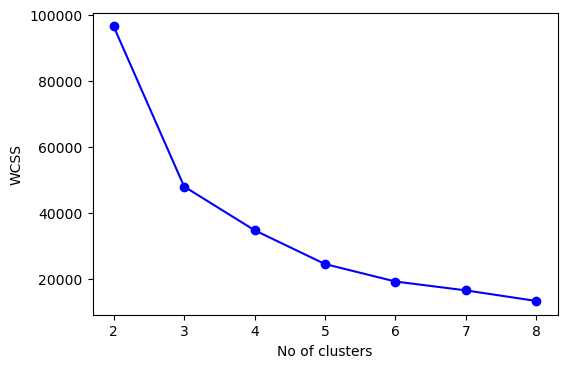

In [44]:
# Elbow plot
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(range(2,9), wcss, marker = 'o', c = 'blue')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Final model with 5 clusters
kmod_final = KMeans(n_clusters = 5, init = 'k-means++').fit(data_num)
cl = kmod_final.predict(data_num)
cl

array([0, 0, 3, 4, 0, 4, 1, 0, 3, 4, 2, 1, 0, 1, 2, 1, 1, 0, 2, 3, 4, 0,
       2, 0, 4, 1, 1, 0, 2, 4, 0, 0, 3, 2, 1, 4, 4, 1, 4, 0, 2, 4, 4, 1,
       2, 4, 4, 2, 2, 4])

In [53]:
# Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(data_num, kmod_final.labels_, metric='euclidean')

In [54]:
score

0.4486735234754001

Difficulties faced: 
Visualising the dataset at times is difficult due to the different attributes.
Refernce was taken from online sources to get help for different types of visualization.